In [1]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.support_functions import *

## Data import and manipulation

In [2]:
#Import Schizophrenia data
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose/Patient')
files = os.listdir()
files.sort(key=natural_keys)
shizophrenia_p = list()
for i in range(0,len(files)):
    shizophrenia_p.append(pd.read_csv(files[i]))
    
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose/control')
files = os.listdir()
files.sort(key=natural_keys)
shizophrenia_c = list()
for i in range(0,len(files)):
    shizophrenia_c.append(pd.read_csv(files[i]))
#Import demographics on Schizophrenia patients
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose')
patients_info = pd.read_csv('patients_info.csv')
#Import demographics on control group 
control_info = pd.read_csv('scores.csv')


In [3]:
#Convert strings to datetime 
for i in range(0, len(shizophrenia_c)):
    shizophrenia_c[i]['timestamp'] = pd.to_datetime(shizophrenia_c[i]['timestamp'],format='%Y-%m-%d %H:%M:%S')
    shizophrenia_c[i] = shizophrenia_c[i].drop(['date'], axis=1)

#Convert strings to datetime 
for i in range(0, len(shizophrenia_p)):
    shizophrenia_p[i]['timestamp'] = shizophrenia_p[i]['timestamp'].astype('datetime64[ns]')
    shizophrenia_p[i] = shizophrenia_p[i].drop(['date'], axis=1)


## Example plot of Actigraph time series  

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.plot(shizophrenia_p[10]['timestamp'],shizophrenia_p[10]['activity'])
ax1.plot(shizophrenia_p[10]['timestamp'],shizophrenia_p[10]['activity'].rolling(60).mean())
ax1.set_ylabel('Activity level')
ax1.legend(['Measurements','Hourly smoothed measurements'])
ax1.set_title('Patient')
ax1.set_ylim(top=5100)

ax2.plot(shizophrenia_c[1]['timestamp'],shizophrenia_c[1]['activity'])
ax2.plot(shizophrenia_c[1]['timestamp'],shizophrenia_c[1]['activity'].rolling(60).mean())
#ax2.xticks(rotation=45)
ax2.set_ylabel('Activity level')
ax2.legend(['Measurements','Hourly smoothed measurements'])
ax2.set_title('Control')
ax2.set_ylim(top=5100)

ax3.plot(shizophrenia_p[1]['timestamp'],shizophrenia_p[1]['activity'].diff(720))
#ax2.xticks(rotation=45)
ax3.set_ylabel('Activity level')
ax3.legend(['Lag 720'])
ax3.set_title('Patient')



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


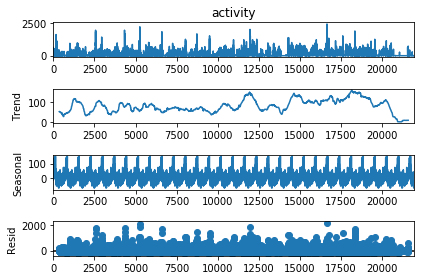

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(shizophrenia_p[1]['activity'], model='additive', freq=720)
result.plot()
plt.show()

In [5]:
#get daily data for patients
patients_daily = list()
for i in range(0,len(shizophrenia_p)):
    patients_daily.append(get_intervals(shizophrenia_p[i],intervals = 0))

# get day and night data for patients 
patients_day = list()
for i in range(0,len(shizophrenia_p)):
    patients_day.append(get_intervals(shizophrenia_p[i],intervals = 1))

patients_night = list()
for i in range(0,len(shizophrenia_p)):
    patients_night.append(get_intervals(shizophrenia_p[i],intervals = 2))

In [6]:
#get daily data for control group
control_daily = list()
for i in range(0,len(shizophrenia_c)):
    control_daily.append(get_intervals(shizophrenia_c[i],intervals = 0))

# get day and night data for patients 
control_day = list()
for i in range(0,len(shizophrenia_c)):
    control_day.append(get_intervals(shizophrenia_c[i],intervals = 1))

control_night = list()
for i in range(0,len(shizophrenia_c)):
    control_night.append(get_intervals(shizophrenia_c[i],intervals = 2))

# Analysing time series distributions of patients and control group

## Comparing histograms of activity during the day

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(5,10))
ax1.hist(x=patients_day[10].mean(axis=1), bins=15, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
        
ax1.hist(x=control_day[1].mean(axis=1), bins=15, color='orange', 
                            alpha=0.7, rwidth=0.85)

ax2.hist(x=control_day[11].mean(axis=1), bins=15, color='orange',
                            alpha=0.7, rwidth=0.85)
ax2.hist(x=patients_day[11].mean(axis=1), bins=15, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
ax3.hist(x=control_day[5].mean(axis=1), bins=15, color='orange',
                            alpha=0.7, rwidth=0.85)
ax3.hist(x=patients_day[5].mean(axis=1), bins=15, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
ax4.hist(x=control_day[12].mean(axis=1), bins=15, color='orange',
                            alpha=0.7, rwidth=0.85)
ax4.hist(x=patients_day[12].mean(axis=1), bins=15, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
ax5.hist(x=control_day[14].mean(axis=1), bins=15, color='orange',
                            alpha=0.7, rwidth=0.85)
ax5.hist(x=patients_day[14].mean(axis=1), bins=15, color='#0504aa',
                                alpha=0.7, rwidth=0.85)

## Comparing boxplots of activity during the day

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10,10))
ax1.boxplot([patients_day[0].mean(axis=1),control_day[0].mean(axis=1)])
ax1.set_title('Patient | Control')
ax2.boxplot([patients_day[5].mean(axis=1),control_day[10].mean(axis=1)])
ax3.boxplot([patients_day[6].mean(axis=1),control_day[11].mean(axis=1)])
ax4.boxplot([patients_day[4].mean(axis=1),control_day[19].mean(axis=1)])



# Extract Features

In [7]:
# Daily and nightly mean, variance and proportions of zero
# Get the daily mean and variance
p_day_mean= list()
p_night_mean = list()
p_daily_mean = list()
p_day_var= list()
p_night_var = list()
p_daily_var = list()
p_IS = list()
#Patients 
for i in range(0, len(patients_day)):
    p_day_mean.append(np.mean(np.mean(patients_day[i], axis=1),axis=0))
    p_night_mean.append(np.mean(np.mean(patients_night[i], axis=1),axis=0))
    p_daily_mean.append(np.mean(np.mean(patients_daily[i], axis=1),axis=0))
    
    p_day_var.append(np.var(np.var(patients_day[i], axis=1),axis=0))
    p_night_var.append(np.var(np.var(patients_night[i], axis=1),axis=0))
    p_daily_var.append(np.var(np.var(patients_daily[i], axis=1),axis=0))
    
    p_IS.append(np.sqrt(np.nanmean(np.square(np.mean(patients_daily[i],axis=1).diff()))))
    
c_day_mean= list()
c_night_mean = list()
c_daily_mean = list()
c_day_var= list()
c_night_var = list()
c_daily_var = list()
c_IS = list()
#Control 
for i in range(0, len(control_day)):
    c_day_mean.append(np.mean(np.mean(control_day[i], axis=1),axis=0))
    c_night_mean.append(np.mean(np.mean(control_night[i], axis=1),axis=0))
    c_daily_mean.append(np.mean(np.mean(control_daily[i], axis=1),axis=0))
    
    c_day_var.append(np.var(np.var(control_day[i], axis=1),axis=0))
    c_night_var.append(np.var(np.var(control_night[i], axis=1),axis=0))
    c_daily_var.append(np.var(np.var(control_daily[i], axis=1),axis=0))
    
    c_IS.append(np.sqrt(np.nanmean(np.square(np.mean(control_daily[i],axis=1).diff()))))

    
#Patients propZeros 
p_propZeros = list()
for i in range(0, len(patients_day)):
    p_propZeros.append(len(shizophrenia_p[i].loc[shizophrenia_p[i]['activity']==0])/len(shizophrenia_p[i]))

#Controls propZeros 
c_propZeros = list()
for i in range(0, len(control_day)):
    c_propZeros.append(len(shizophrenia_c[i].loc[shizophrenia_c[i]['activity']==0])/len(shizophrenia_c[i]))

    
#Merge together 
patient_id = [None]*len(patients_day)
for i in range(0, len(patients_day)):
    patient_id[i] = 'patient_' + str(i)
control_id = [None]*len(control_day)    
for j in range(0, len(control_day)):
    control_id[j] = 'control_' + str(j)



In [8]:
#Create DF
column_names = ['id', 'daily_mean', 'day_mean','night_mean','day_var','night_var','propZeros','InterdailyStab']
feature_df = pd.DataFrame(columns=column_names)

feature_df['id'] = patient_id+control_id
feature_df['daily_mean'] = p_daily_mean+c_daily_mean
feature_df['day_mean'] =  p_day_mean+c_day_mean
feature_df['night_mean'] =  p_night_mean+c_night_mean
feature_df['day_var'] =  p_day_var+c_day_var
feature_df['night_var'] =  p_night_var+c_night_var
feature_df['propZeros'] =  p_propZeros+c_propZeros
feature_df['InterdailyStab'] =  p_IS+c_IS



## Fast Fourier Transformation

In [9]:
from scipy.fftpack import fft, fftfreq, ifft
k = 1
trans_fft = fft(shizophrenia_p[k]['activity'])
trans_psd = np.abs(trans_fft) ** 2
#Since the original sampling frequency is 32 Hz according to paper
fftfreq = fftfreq(len(trans_psd), 1. / 32)
l = fftfreq > 0

Text(0,0.5,'PSD (dB)')

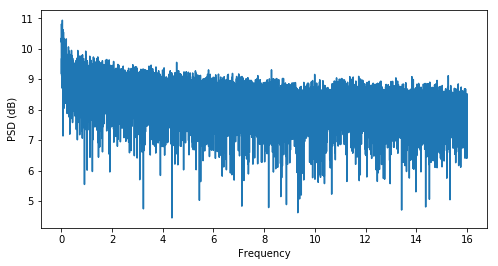

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[l], np.log10(trans_psd[l]))
ax.set_xlabel('Frequency')
#ax.set_xlim(0,0.5)
ax.set_ylabel('PSD (dB)')

In [11]:
max_peak = fftfreq[pd.Series(trans_psd)[1:].idxmax()]
print('max Peak:', max_peak)


max Peak: 0.04520185910872141


In [12]:
trans_fft_bis = trans_fft.copy()
trans_fft_bis1 = trans_fft.copy()
trans_fft_bis[np.abs(fftfreq) > 0.5] = 0
#Delete Frequencies over the max peak to decrease the noise!
trans_fft_bis1[np.abs(fftfreq) > max_peak] = 0


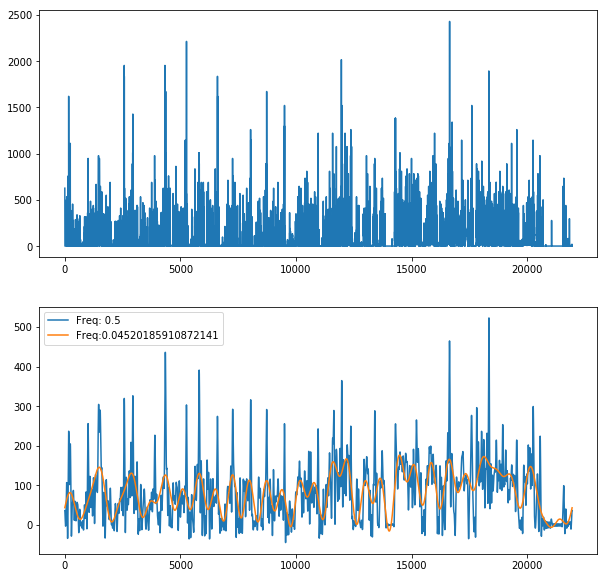

In [13]:
trans = np.real(ifft(trans_fft_bis))
trans1 = np.real(ifft(trans_fft_bis1))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot(shizophrenia_p[k]['activity'].index, shizophrenia_p[k]['activity'])
ax1.set_label('Original TS')
ax2.plot(shizophrenia_p[k]['activity'].index, trans)
ax2.plot(shizophrenia_p[k]['activity'].index, trans1)
ax2.set_label('Fourier transformed TS')
ax2.legend(['Freq: 0.5','Freq:'+str(max_peak)])

## Feature Extraction of Power Spectral Density

In [14]:
## Extract feature for patients 
var = list()
mean = list()
max_peak_pos = list()

column_names = ['id', 'psd_mean', 'psd_var','max_peak_pos']
psd_features_p = pd.DataFrame(columns=column_names)
psd_features_p.id = patient_id
for l in range(0,len(shizophrenia_p)):
    trans_fft = fft(shizophrenia_p[l]['activity'])
    trans_psd = np.log10(np.abs(trans_fft) ** 2)
    var.append(np.var(trans_psd))
    mean.append(np.mean(trans_psd))
    max_peak_pos.append(pd.Series(trans_psd)[1:].idxmax())
psd_features_p.id = patient_id
psd_features_p.psd_var = var
psd_features_p.psd_mean = mean
psd_features_p.max_peak_pos = max_peak_pos

In [15]:
## Extract feature for control
var = list()
mean = list()
max_peak_pos = list()

column_names = ['id', 'psd_mean', 'psd_var','max_peak_pos']
psd_features_c = pd.DataFrame(columns=column_names)
psd_features_c.id = control_id
for l in range(0,len(shizophrenia_c)):
    trans_fft = fft(shizophrenia_c[l]['activity'])
    trans_psd = np.log10(np.abs(trans_fft) ** 2)
    var.append(np.var(trans_psd))
    mean.append(np.mean(trans_psd))
    max_peak_pos.append(pd.Series(trans_psd)[1:].idxmax())
psd_features_c.id = control_id
psd_features_c.psd_var = var
psd_features_c.psd_mean = mean
psd_features_c.max_peak_pos = max_peak_pos
freq_features = psd_features_p.append(psd_features_c)

In [16]:
#Allign all features together 
freq_features.index = freq_features.id
freq_features = freq_features.drop('id', axis=1)

In [17]:
feature_df.reset_index(drop=True, inplace=True)
freq_features.reset_index(drop=True, inplace=True)
all_features = pd.concat([feature_df,freq_features], axis=1)

Problem of Multicolineratiy


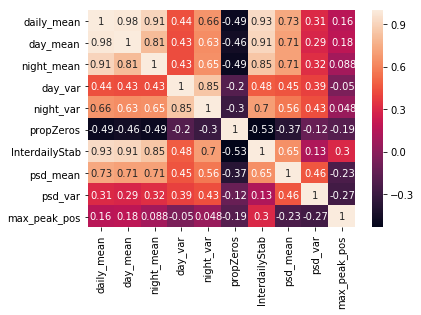

In [18]:
import seaborn as sns
corr = all_features.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,yticklabels=corr.columns, annot=True)
print('Problem of Multicolineratiy')

In [19]:
all_features['y'] = 1
all_features.loc[all_features['id'].str.contains('control'),'y'] = 0
features = all_features.drop(['id'],axis=1)

## Check on the single dependencies

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
ax1.scatter(x=features['daily_mean'], y=features['y'], marker='.')
ax1.set_xlabel('Day Mean')
ax1.set_ylabel('Schizophrenia')
ax2.scatter(x=features['psd_var'], y=features['y'], marker='.')
ax2.set_xlabel('psd_var')
ax2.set_ylabel('Schizophrenia')
ax3.scatter(x=np.square(features['propZeros']), y=features['y'], marker='.')
ax3.set_xlabel('propZeros')
ax3.set_ylabel('Schizophrenia')
ax4.scatter(x=features['propZeros'], y=features['y'], marker='.')
ax4.set_xlabel('propZeros')
ax4.set_ylabel('Schizophrenia')


## Select features

In [20]:
feat = features[['psd_var', 'psd_mean', 'propZeros','daily_mean','y']]
#feat = features[['max_peak_pos', 'psd_var', 'propZeros', 'y']]
#feat = features[['day_mean', 'day_var', 'propZeros','y']]


# Implement Logistic Regression Model 

In [24]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
X = feat.iloc[:,:-1].copy()
y = feat.y.copy()
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=123, stratify = y)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=120)

class_weight = 'balanced'
penalty = 'l2'
C=1e8
n_jobs =1
solver='lbfgs'
logReg = LogisticRegression(C=C,random_state=103,penalty = penalty, solver=solver, n_jobs=n_jobs )


In [25]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,
                               logReg.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/li

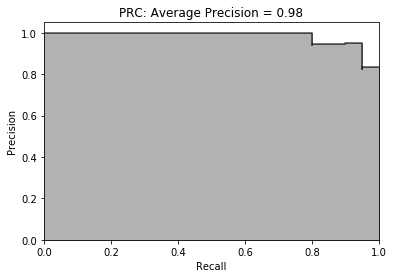

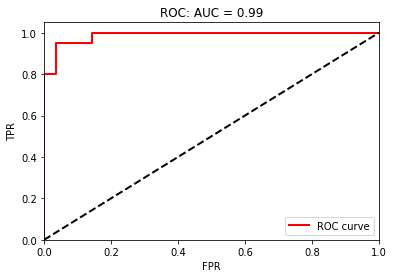

Precision: 0.9342339911948877
Recall: 0.7999999999999999


array([[31,  1],
       [ 1, 21]])

In [26]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()
print('Precision:', np.mean(precision))
print('Recall:', np.mean(recall))
confusion_matrix(y, logReg.predict(X))

In [27]:
#Using statsmodels 
import statsmodels.api as sm
#feat = features[['max_peak_pos', 'psd_var', 'propZeros', 'InterdailyStab','y']]
#feat = features[['max_peak_pos', 'psd_var', 'propZeros', 'y']]
#feat = features[['day_mean', 'day_var', 'propZeros','y']]
feat = features[['psd_var', 'psd_mean', 'propZeros','daily_mean','y']]

In [35]:
X = feat.iloc[:,:-1].copy()
y = feat.y.copy()
logit_model=sm.Logit(y,X, method='lbfgs')
result_c=logit_model.fit()
print(result_c.summary2())

Optimization terminated successfully.
         Current function value: 0.443256
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.344     
Dependent Variable: y                AIC:              55.8717   
Date:               2020-06-22 11:19 BIC:              63.8276   
No. Observations:   54               Log-Likelihood:   -23.936   
Df Model:           3                LL-Null:          -36.499   
Df Residuals:       50               LLR p-value:      1.4534e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
psd_var        -40.1220  15.0612 -2.6639 0.0077 -69.6413 -10.6026
psd_mean         2.1668   0.8700  2.4906 0.0128   0.4617   3.8718


In [36]:
#Implement score df
binary = result_c.predict()
binary[binary > 0.5] = 1
binary[binary <= 0.5] = 0
scores = pd.DataFrame(columns= ['y', 'y_hat', 'y_hat_prob'])
scores['y'] = y
scores['y_hat_prob'] = result_c.predict()
scores['y_hat'] = binary
#Implement Confusion matrix
cm = confusion_matrix(scores['y'], scores['y_hat'])
print('acc:',binary_classifier(cm , score = 'a')) 
print('recall:', binary_classifier(cm , score = 'r')) 
print('f1-score', binary_classifier(cm , score = 'fone'))



acc: 0.8518518518518519
recall: 0.7272727272727273
f1-score 0.8823529411764706


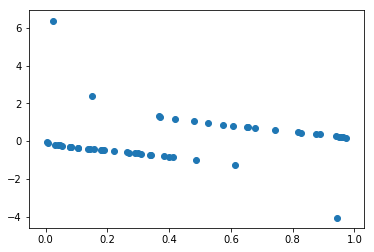

In [40]:
plt.scatter( scores['y_hat_prob'],result_c.resid_pearson)
plt.y

## Spectrogram for CNN

In [ ]:
# Idea: implement CNN to learn statistical relevant features for the time series, then build in invariances 
# the pictures to increase the sample size 

In [ ]:
f, t, Sxx = spectrogram(shizophrenia_c[4]['activity'], fs=(1. / 32))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
f, t, Sxx = spectrogram(shizophrenia_p[4]['activity'], fs=(1. / 32))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
f, t, Sxx = spectrogram(shizophrenia_p[10]['activity'], fs=(1. / 32))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
f, t, Sxx = spectrogram(shizophrenia_c[1]['activity'], fs=(1. / 32))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()